<center><h1>PRODIGY INFOTECH</h1></center>

<center><h2>TASK 03 : Decision Tree Classifier</h2></center>

<h3>Importing the libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h3>Load the data</h3>

In [2]:
bank_data=pd.read_csv("bank-full.csv")

In [3]:
bank_data.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


<h3>Splitting single column</h3>

In [4]:
# Split the single column into multiple columns
data_split = bank_data['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';', expand=True)

# Assign column names
column_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
data_split.columns = column_names

# Drop the original single column
data = data_split.copy()

<h3>Loading the data again</h3>

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


<h3>Check the dimensions</h3>

In [6]:
print("\nDataset Dimensions:")
print("Rows:", data.shape[0])
print("Columns:",data.shape[1])


Dataset Dimensions:
Rows: 45211
Columns: 17


<h3>Check The Null Values</h3>

In [7]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
data_encoded = pd.get_dummies(data, drop_first=True)
print(data_encoded.columns)

Index(['age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_25',
       'age_26', 'age_27', 'age_28',
       ...
       'previous_55', 'previous_58', 'previous_6', 'previous_7', 'previous_8',
       'previous_9', 'poutcome_"other"', 'poutcome_"success"',
       'poutcome_"unknown"', 'y_"yes"'],
      dtype='object', length=9526)


<h3>Splitting the datasets</h3>

In [9]:
# Split the dataset into features (X) and the target variable (y)
X = data_encoded.drop(columns=['y_"yes"'])
y = data_encoded['y_"yes"']

In [10]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Train the Decision Tree Classifier</h3>

In [11]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<h3>Data Visualization</h3>

<h3>1. Confusion Matrix</h3>

<Figure size 800x600 with 0 Axes>

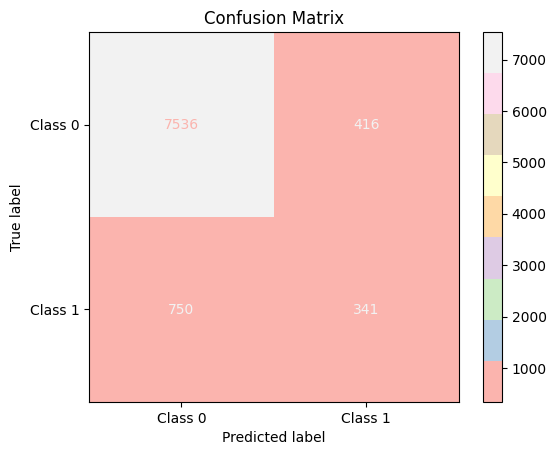

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with advanced features
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Pastel1', values_format='d')
plt.title('Confusion Matrix')
plt.show()

<h3>2. ROC Curve</h3>

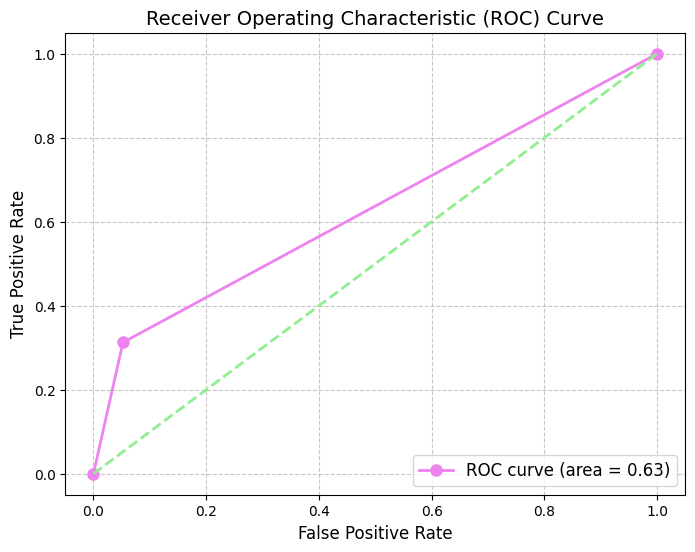

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve with advanced features
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='violet', lw=2, label='ROC curve (area = %0.2f)' % roc_auc, marker='o', markersize=8, linestyle='-')
plt.plot([0, 1], [0, 1], color='lightgreen', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h3>3.Precision-Recall Curve</h3>

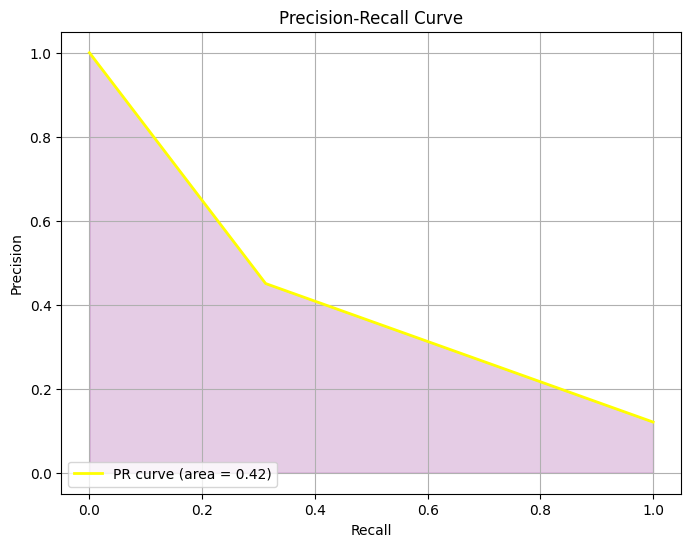

In [17]:
from sklearn.metrics import precision_recall_curve, auc

# Compute precision-recall curve and area under the curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='yellow', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.fill_between(recall, precision, alpha=0.2, color='purple')  # Fill area under the curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

<h3>4.Pie Chart</h3>

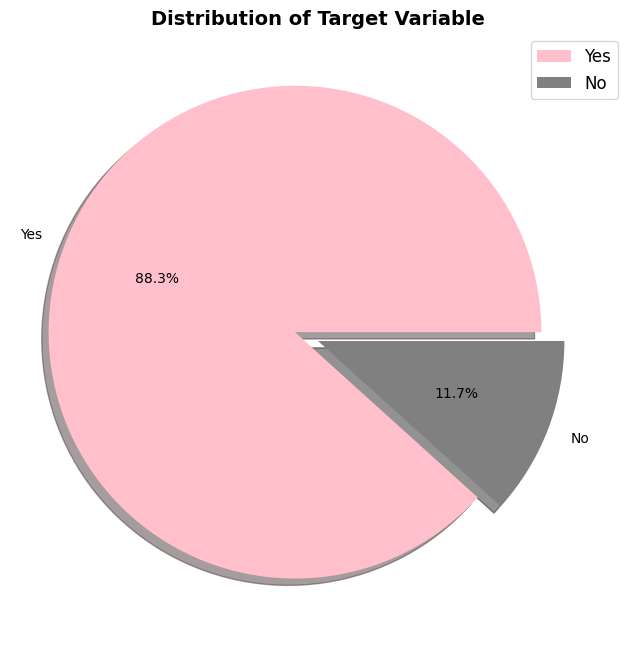

In [18]:
plt.figure(figsize=(8, 8))
explode = (0.1, 0)  # Explode the first slice (Yes) for emphasis
colors = ['pink', 'grey']
labels = ['Yes', 'No']  # Custom labels for the target variable
data['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, labels=labels)
plt.title('Distribution of Target Variable', fontsize=14, fontweight='bold')  # Add a title with custom font properties
plt.ylabel('')  # Remove the ylabel
plt.legend(loc='upper right', fontsize=12)  # Add a legend with custom font size and location
plt.show()

<h3>4.WordCloud</h3>

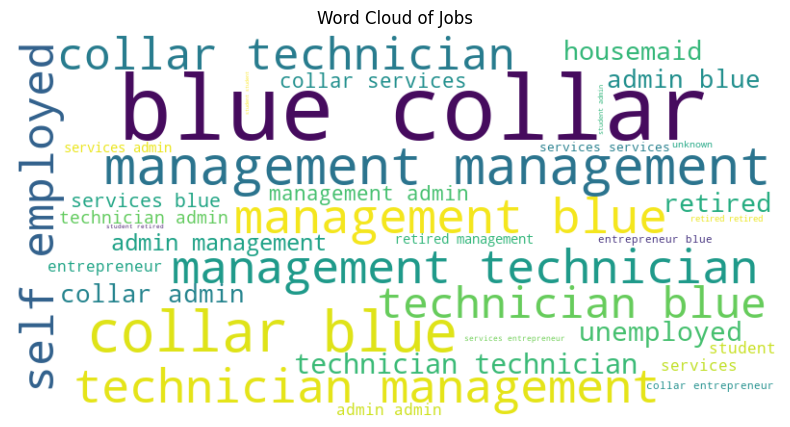

In [19]:
from wordcloud import WordCloud

text = ' '.join(data['job'])  # Assuming 'job' is a column in your dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Jobs')
plt.show()

<h3>5.Hexbin Plot</h3>

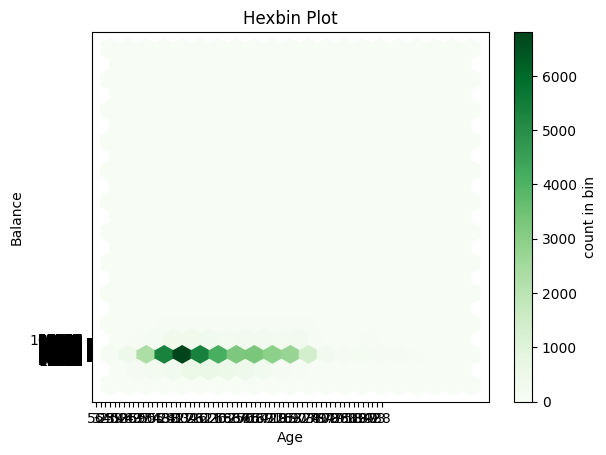

In [20]:
plt.hexbin(data['age'], data['balance'], gridsize=20, cmap='Greens')
plt.colorbar(label='count in bin')
plt.title('Hexbin Plot')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

<h3>6.Small Portion of Visualization of Decision Tree</h3>

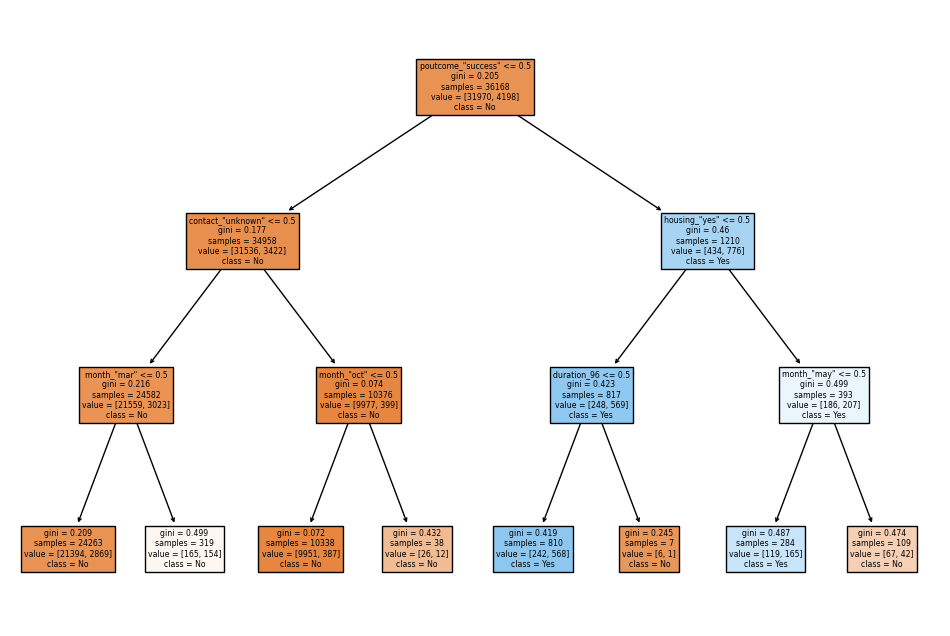

In [22]:
from sklearn.tree import plot_tree

# Initialize the decision tree classifier with max_depth parameter
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Plot the decision tree with limited depth
plt.figure(figsize=(12, 8)) 
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()

<h3>Evaluate the model</h3>

In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8909653875926131
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.69      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



<h3>Conclusion</h3>

Based on the classification report provided earlier, here's an analysis of the model's performance in predicting whether a customer will purchase a product or service based on their demographic and behavioral data:

- Precision: 
    - The precision for class 0 (customers who did not purchase) is high, indicating that when the model predicts a customer will not purchase, it is correct about 91% of the time.
    - The precision for class 1 (customers who purchased) is relatively low at around 45%, meaning that when the model predicts a customer will purchase, it is correct only about 45% of the time.

- Recall:
    - The recall for class 0 is also high, indicating that the model correctly identifies about 95% of the customers who did not purchase.
    - The recall for class 1 is lower at around 31%, indicating that the model only correctly identifies about 31% of the customers who actually purchased.

- F1-score:
    - The F1-score, which is the harmonic mean of precision and recall, is higher for class 0 compared to class 1, suggesting better overall performance in predicting customers who did not purchase.

- Accuracy:
    - The overall accuracy of the model is approximately 87%, indicating that the model correctly predicts whether a customer will purchase or not about 87% of the time.

In summary, while the model performs well in predicting customers who did not purchase, it struggles to accurately predict customers who did purchase. This could indicate a class imbalance or other issues in the dataset, and further analysis and model refinement may be necessary to improve predictions for the positive class.